In [1]:
from openff.toolkit import Molecule
from utils import draw_molecule

from openff.pdbscan.pdb import topology_from_pdb, CCD_RESIDUE_DEFINITION_CACHE

%load_ext snakeviz

In [2]:
CCD_RESIDUE_DEFINITION_CACHE

CcdCache(path=/home/joshmitchell/Documents/openff/openff-pdbscan/openff/.ccd_cache, preload=['ALA', 'ARG', 'ASN', 'ASP', 'CYS', 'GLN', 'GLU', 'GLY', 'HIS', 'ILE', 'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL', 'ACE'], patches={'*': <function disambiguate_alt_ids at 0x7c6f2bc25bc0>, 'ACE': <function fix_caps at 0x7c6f34dc1ee0>, 'NME': <function combine_patches.<locals>.<lambda> at 0x7c6f2bc25d00>, 'NA': <function add_synonyms at 0x7c6f2bc25b20>, 'CL': <function add_synonyms at 0x7c6f2bc25b20>})

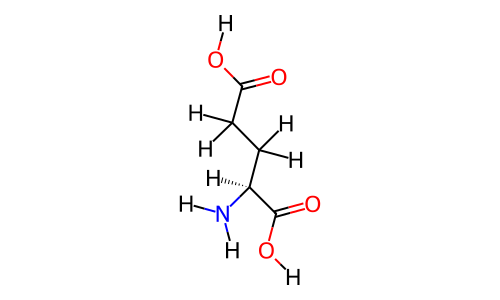

In [3]:
Molecule.from_smiles("[H][O][C](=[O])[C]([H])([H])[C]([H])([H])[C@@]([H])([C](=[O])[O][H])[N]([H])[H]")

In [4]:
# %%snakeviz
# top = topology_from_pdb("/home/joshmitchell/Downloads/2p41.pdb")
top = topology_from_pdb(
    "5ap1_prepared.pdb",
    unknown_molecules=[
        Molecule.from_smiles(
            "O=C([O-])Cn1cc(cn1)c2ccc(cc2OCC#N)Nc3ccc(c(n3)NC4CCCCC4)C#N"
        )
    ],
)

matching atom names ['C', 'O', 'CH3', 'H1', 'H2', 'H3']
    ... to residue definition with atoms [('C', 'atom.leaving=False'), ('O', 'atom.leaving=False'), ('CH3', 'atom.leaving=False'), ('H', 'atom.leaving=True'), ('H1', '1H', 'atom.leaving=False'), ('H2', '2H', 'atom.leaving=False'), ('H3', '3H', 'atom.leaving=False')]...matched!


KeyError: 'H'

In [ ]:
w = top.visualize()
# w.add_representation(
#     "licorice",
#     # sele="not hydrogen",
# )
w

In [ ]:
from openff.toolkit import Topology

old_top = Topology.from_pdb(
    "5ap1_prepared.pdb",
    unique_molecules=[
        Molecule.from_smiles(
            "O=C([O-])Cn1cc(cn1)c2ccc(cc2OCC#N)Nc3ccc(c(n3)NC4CCCCC4)C#N"
        )
    ],
)

In [ ]:
w = old_top.visualize()
w.add_representation(
    "licorice",
    # sele="not hydrogen",
)
w

In [ ]:
for i, (new, old) in enumerate(zip(top.atoms, top.atoms)):
    assert new.name == old.name, f"{new.name=} != {old.name=} (index {i})"
    assert (
        new.atomic_number == old.atomic_number
    ), f"{new.atomic_number=} != {old.atomic_number=} (index {i})"
    assert (
        new.formal_charge == old.formal_charge
    ), f"{new.formal_charge=} != {old.formal_charge=} (index {i})"
    assert (
        new.stereochemistry == old.stereochemistry
    ), f"{new.stereochemistry=} != {old.stereochemistry=} (index {i})"
    assert (
        new.is_aromatic == old.is_aromatic
    ), f"{new.is_aromatic=} != {old.is_aromatic=} (index {i})"

In [ ]:
for i, (new, old) in enumerate(zip(top.bonds, top.bonds)):
    assert new.atom1_index == old.atom1_index, f"{new.atom1_index=} != {old.atom1_index=} (index {i})"
    assert new.atom2_index == old.atom2_index, f"{new.atom2_index=} != {old.atom2_index=} (index {i})"
    assert (
        new.bond_order == old.bond_order
    ), f"{new.bond_order=} != {old.bond_order=} (index {i})"
    assert (
        new.stereochemistry == old.stereochemistry
    ), f"{new.stereochemistry=} != {old.stereochemistry=} (index {i})"
    assert (
        new.is_aromatic == old.is_aromatic
    ), f"{new.is_aromatic=} != {old.is_aromatic=} (index {i})"

In [ ]:
for i, (new, old) in enumerate(zip(top.atoms, old_top.atoms)):
    if (
        new.name != old.name 
        or new.metadata["residue_name"] != old.metadata["residue_name"]
        or new.metadata["residue_number"] != old.metadata["residue_number"]
        or new.formal_charge != old.formal_charge
    ):
        print(
            f"{i: >5}", 
            f"{new.name: >5}", 
            f"{new.metadata["residue_name"]: >5}", 
            f"{new.metadata["residue_number"]: >5}", 
            f"{new.formal_charge.m: >5}", 
            f"{old.name: >5}", 
            f"{old.metadata["residue_name"]: >5}", 
            f"{old.metadata["residue_number"]: >5}", 
            f"{old.formal_charge.m: >5}", 
        )

In [ ]:
from openff.units import unit

assert (top.get_positions() - old_top.get_positions() < 1e-6 * unit.nanometer).all()